In [106]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../Class")
sys.path.append("../utils")

import numpy as np
import matplotlib.pyplot as plt
from loss import  LogSoftMaxCrossEntropy
from lineaire import Linear
from transformations import TanH, SoftMax, ReLU 
from encapsulage import Sequential, Optim
from conv1D import Conv1D, MaxPool1D, Flatten
from conv2D import Conv2D, AvgPool2D, Flatten2D
from sklearn.datasets import fetch_openml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")


uspsdatatrain = "../data/USPS_train.txt"
uspsdatatest = "../data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)


100%|██████████| 100/100 [11:25<00:00,  6.85s/it]


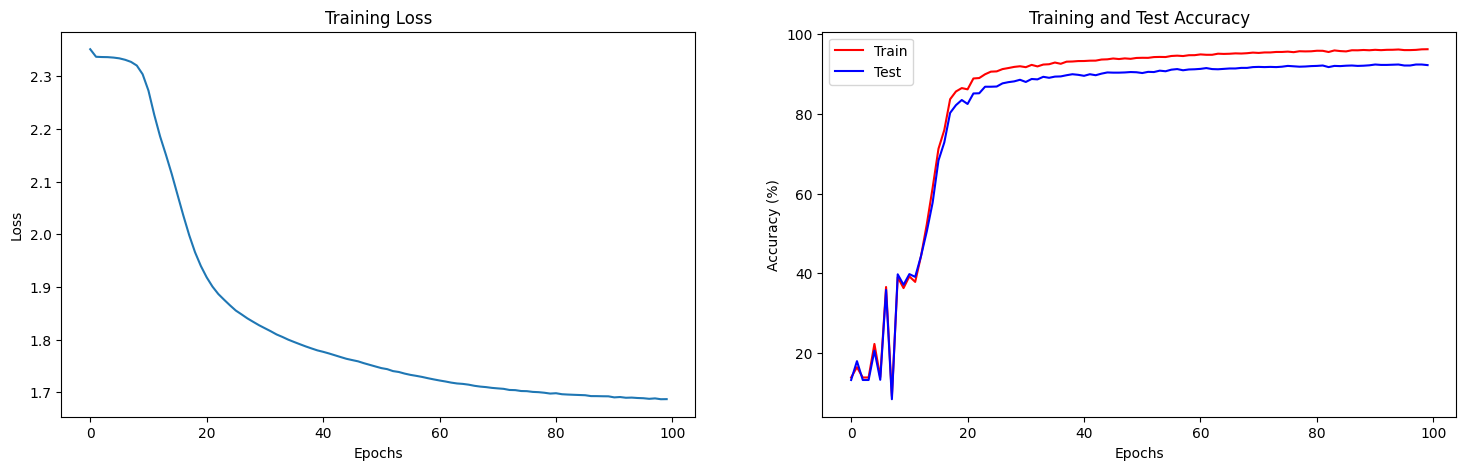

In [4]:

# Conv1D(3,1,32) → MaxPool1D(2,2) → Flatten()→ Linear(4064,100) → ReLU() → Linear(100,10)
network = Sequential(
    Conv1D(3,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4064,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [6]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

accuracy train :  0.9626937319983542
accuracy test   0.9227703039362232


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [09:29<00:00,  5.69s/it]


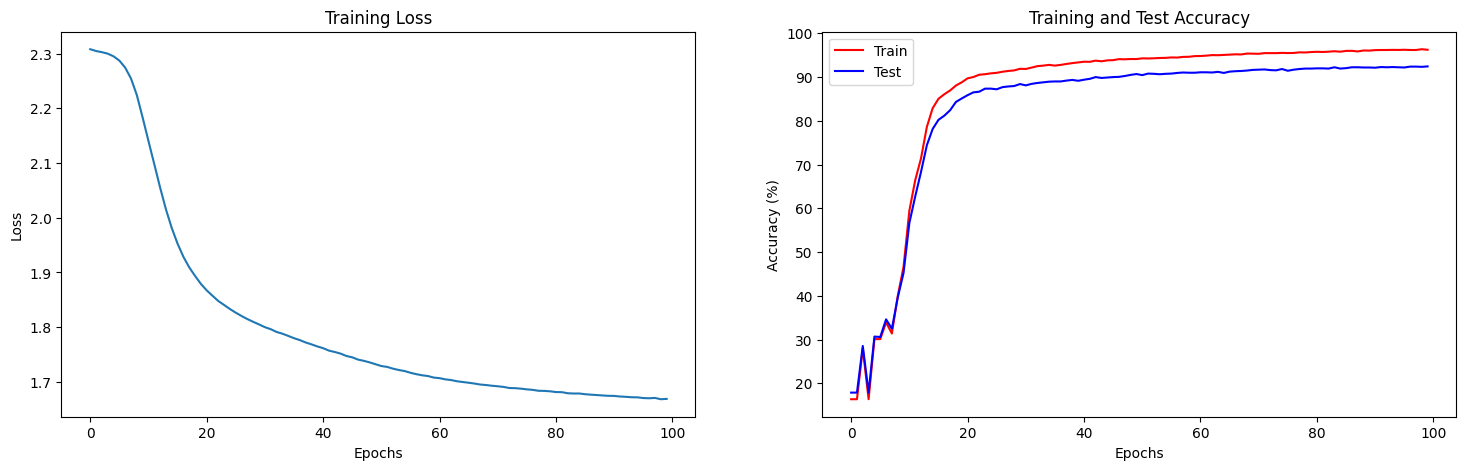

In [74]:
#batch_size=32
network = Sequential(
    Conv1D(3,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4064,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [75]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

accuracy train :  0.9622822658071595
accuracy test   0.924265072247135


100%|██████████| 100/100 [08:04<00:00,  4.85s/it]


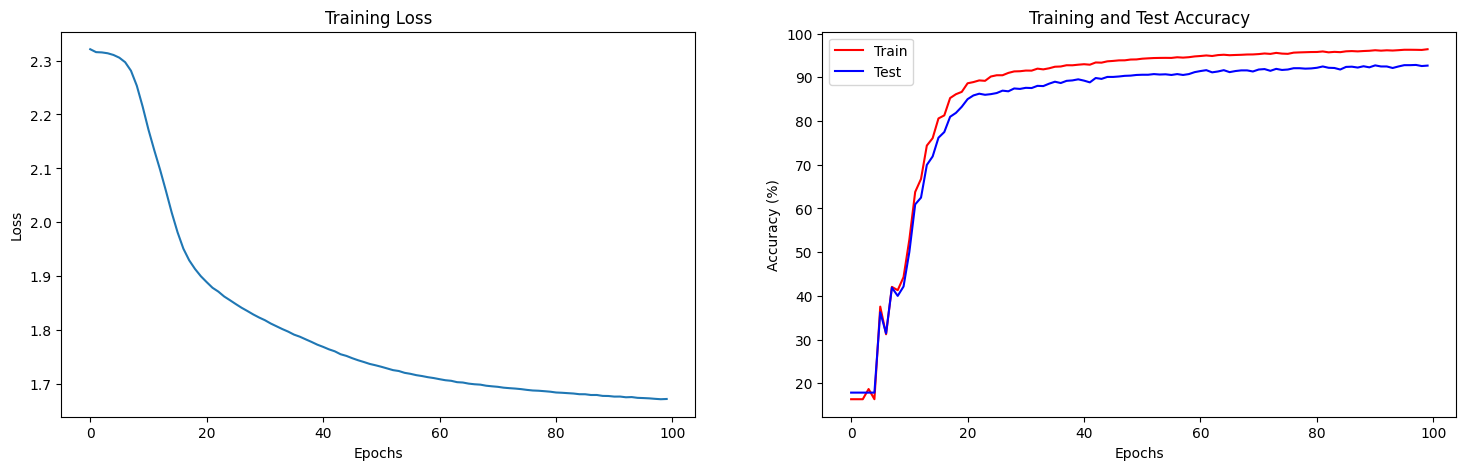

In [76]:
#batch_size=64
network = Sequential(
    Conv1D(3,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4064,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [77]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

accuracy train :  0.9642024413660678
accuracy test   0.9267563527653214


100%|██████████| 100/100 [09:24<00:00,  5.65s/it]


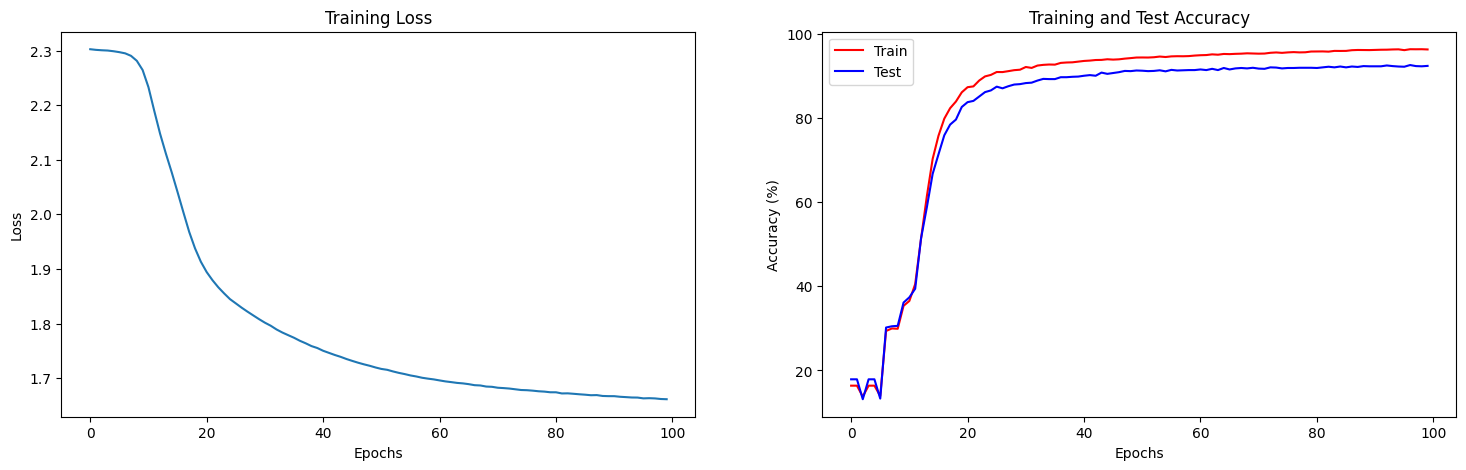

In [78]:

# batch_size=16
network = Sequential(
    Conv1D(3,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4064,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=16,
    epochs=100,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [79]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

accuracy train :  0.962830887395419
accuracy test   0.9237668161434978


100%|██████████| 100/100 [15:20<00:00,  9.20s/it]


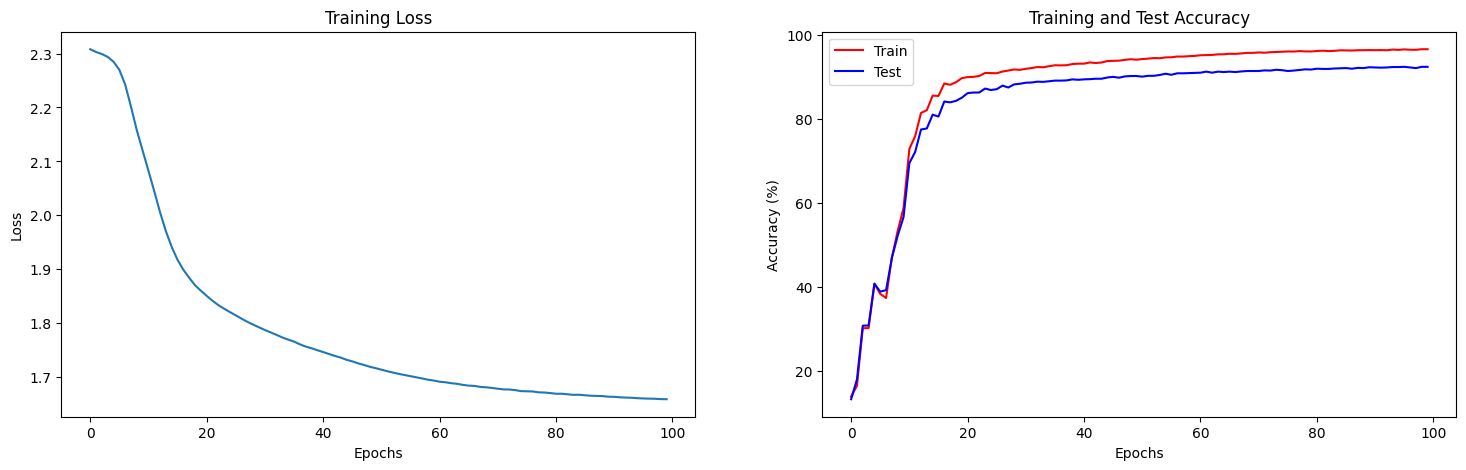

In [80]:
#chan_in 32
network2 = Sequential(
    Conv1D(3,1,64,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(8128,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network2, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [81]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

accuracy train :  0.9662597723220409
accuracy test   0.924265072247135


100%|██████████| 100/100 [30:27<00:00, 18.28s/it]


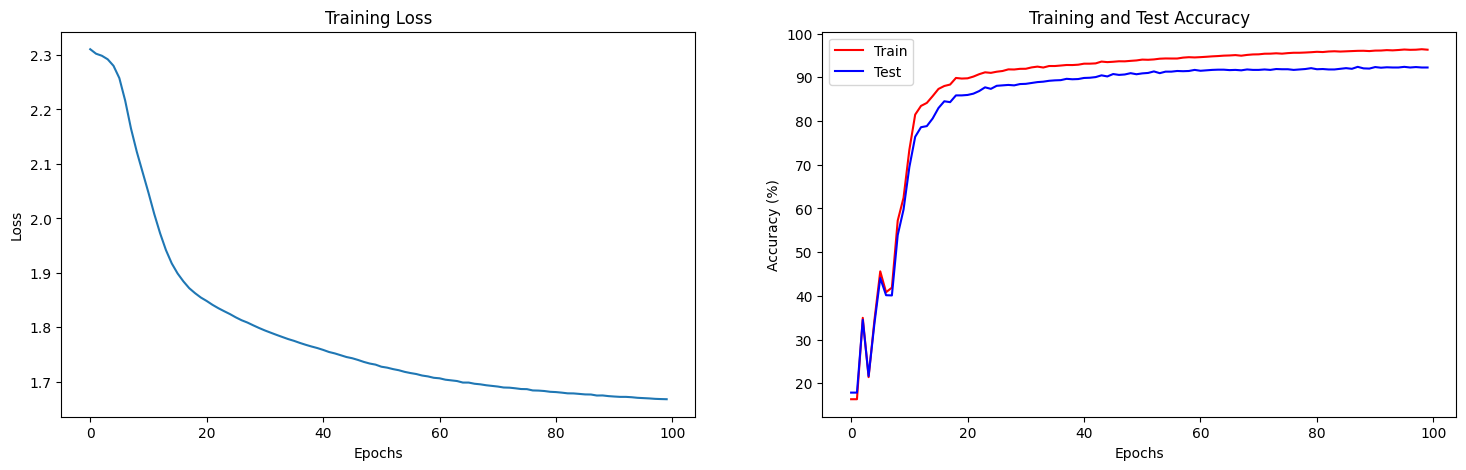

In [82]:
#chan_in 128
network2 = Sequential(
    Conv1D(3,1,128,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(16256,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network2, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [83]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

accuracy train :  0.9629680427924839
accuracy test   0.922272047832586


100%|██████████| 100/100 [05:09<00:00,  3.10s/it]


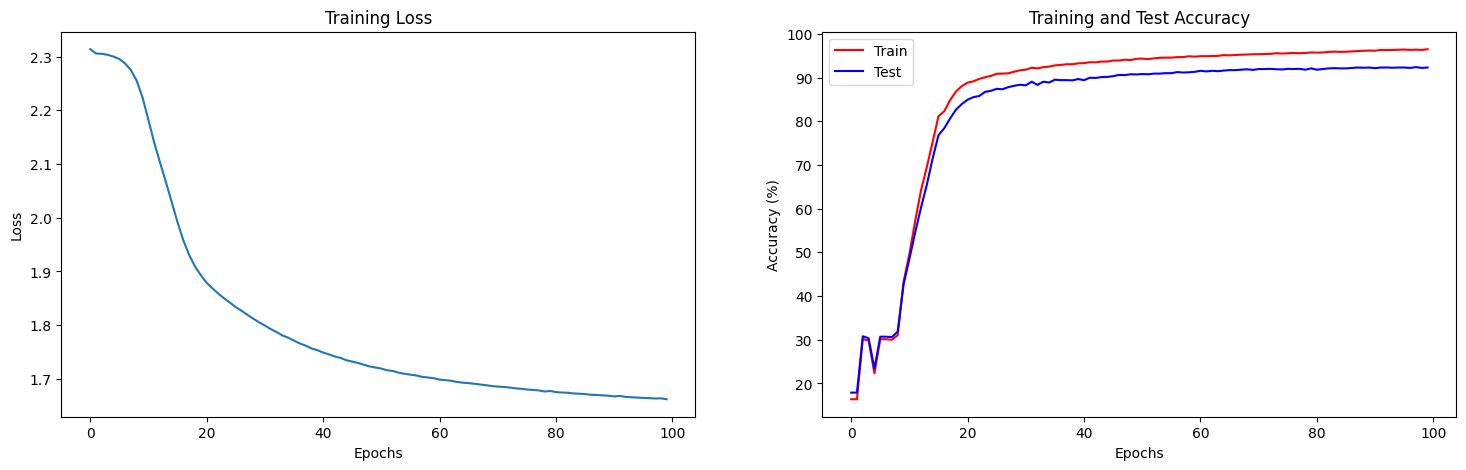

In [84]:
# chan_in 16
network2 = Sequential(
    Conv1D(3,1,16,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(2032,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network2, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [85]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

accuracy train :  0.9651625291455219
accuracy test   0.9232685600398605


  0%|          | 0/15 [00:00<?, ?it/s]/Users/zhile/Documents/GitHub/ML-project/Test/../Class/conv1D.py:94: RuntimeWarning: invalid value encountered in at
  np.add.at(res, (batch_indices, indexes, channel_indices), new_flat)
100%|██████████| 15/15 [01:20<00:00,  5.36s/it]


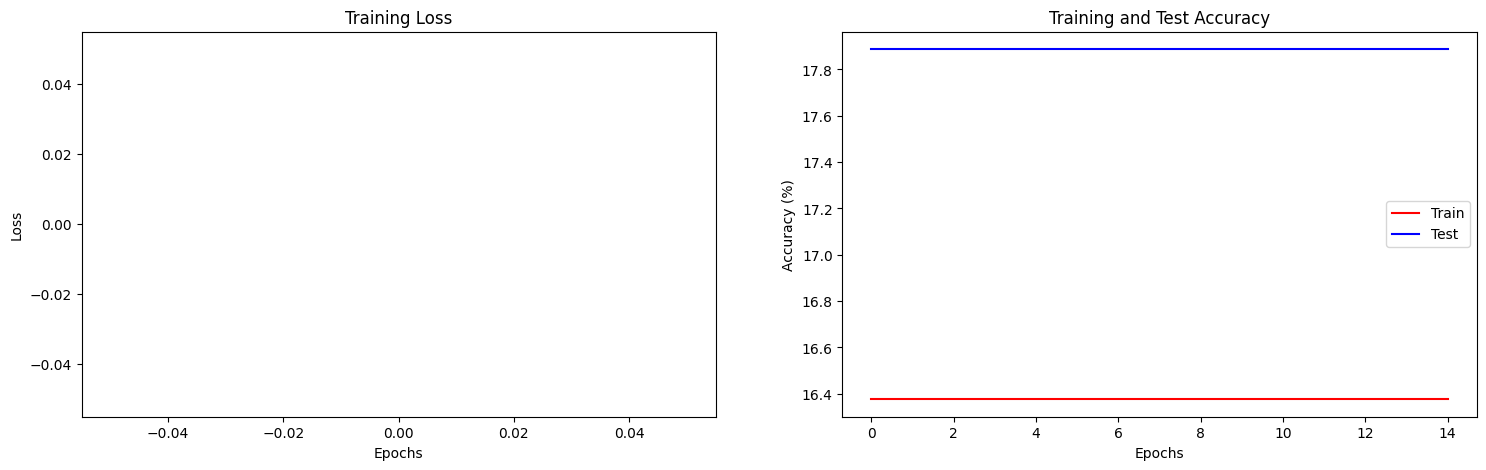

In [87]:
# k_size 5
network = Sequential(
    Conv1D(5,1,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(4032,100),
    ReLU(),
    Linear(100,10),
)

optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-3)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=128,
    epochs=15,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [ ]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

100%|██████████| 100/100 [2:18:56<00:00, 83.36s/it] 


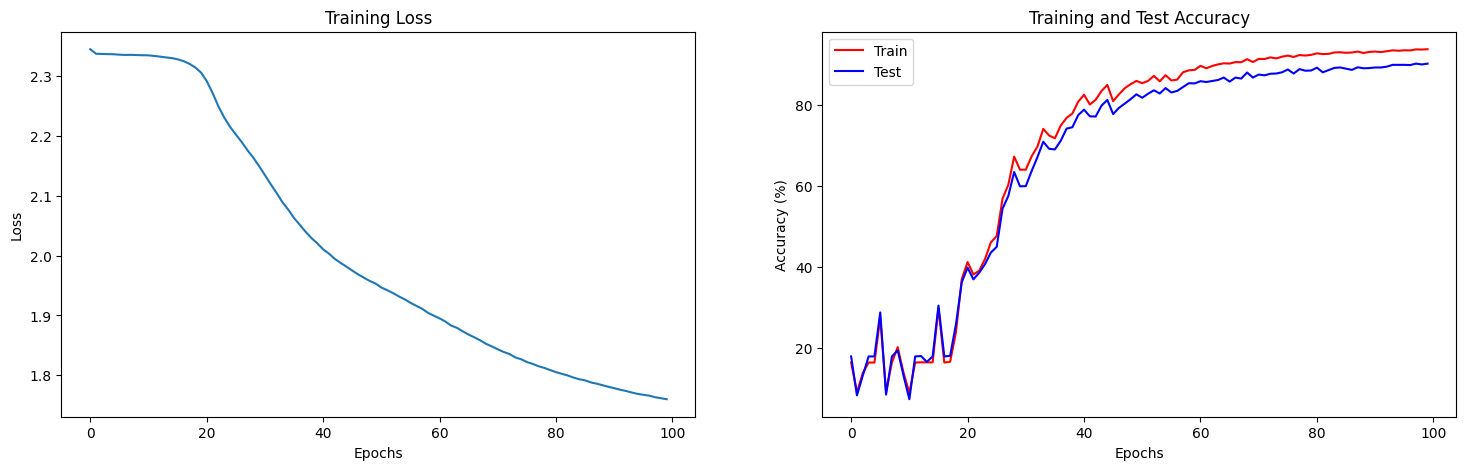

In [29]:
network = Sequential(
    Conv1D(3,1,128,1),
    MaxPool1D(2,2),
    Conv1D(3,128,32,1),
    MaxPool1D(2,2),
    Flatten(),
    Linear(1984,100),
    ReLU(),
    Linear(100,10),
)


optimizer = Optim(network, LogSoftMaxCrossEntropy(),  1e-4)
optimizer.SGD(
    x_train=alltrainx[:,:,np.newaxis],
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx[:,:,np.newaxis],
    y_test=alltesty,
    plot=True,
)

In [30]:
print("accuracy train : ", optimizer.score(alltrainx[:,:,np.newaxis], alltrainy))
print("accuracy test  ", optimizer.score(alltestx[:,:,np.newaxis], alltesty))

accuracy train :  0.9374571389384172
accuracy test   0.9018435475834579


In [93]:
# expend data usps en 2D (batch, height, width, channel)
alltrainx_2d = alltrainx.reshape(-1,16,16,1)
alltestx_2d = alltestx.reshape(-1,16,16,1)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [07:59<00:00,  4.80s/it]


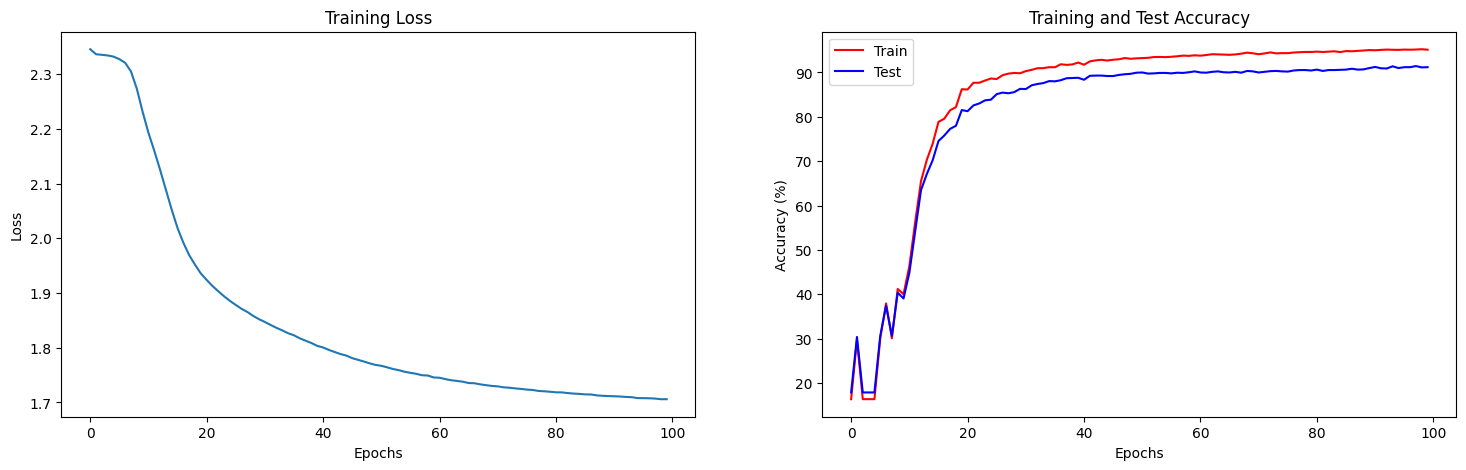

In [70]:
network_2d = Sequential(
    Conv2D(3,3,1,32,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(1568,100),
    ReLU(),
    Linear(100,10),
)

optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [53]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9525442326155534
accuracy test   0.9162929745889388


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [07:49<00:00,  4.70s/it]


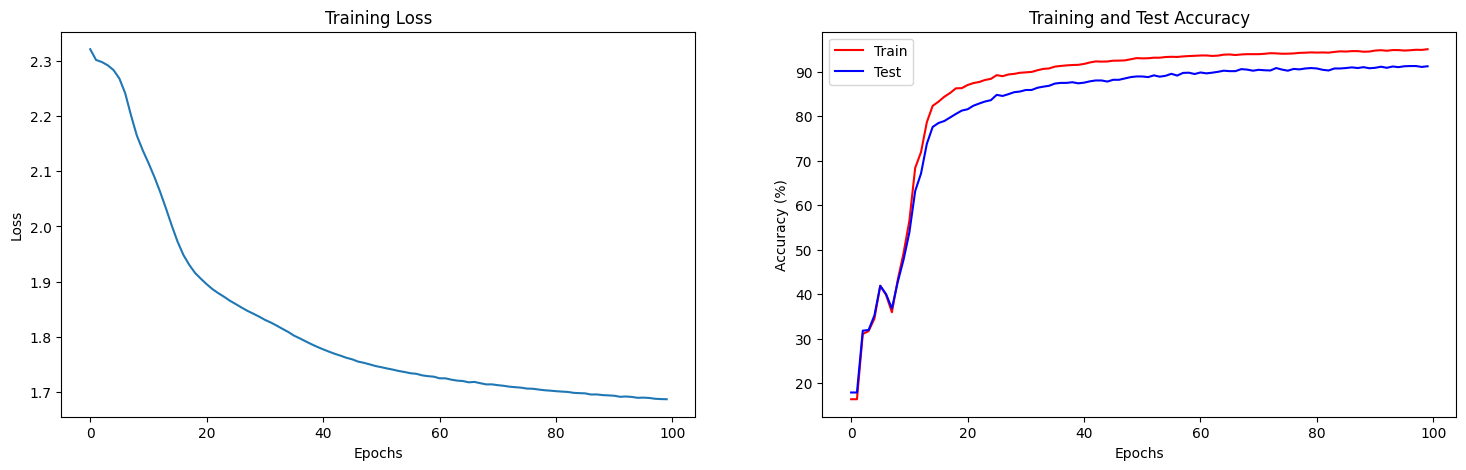

In [97]:
network_2d = Sequential(
    Conv2D(3,3,1,32,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(1568,100),
    ReLU(),
    Linear(100,10),
)
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [98]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9506240570566452
accuracy test   0.9123069257598405


100%|██████████| 100/100 [07:47<00:00,  4.67s/it]


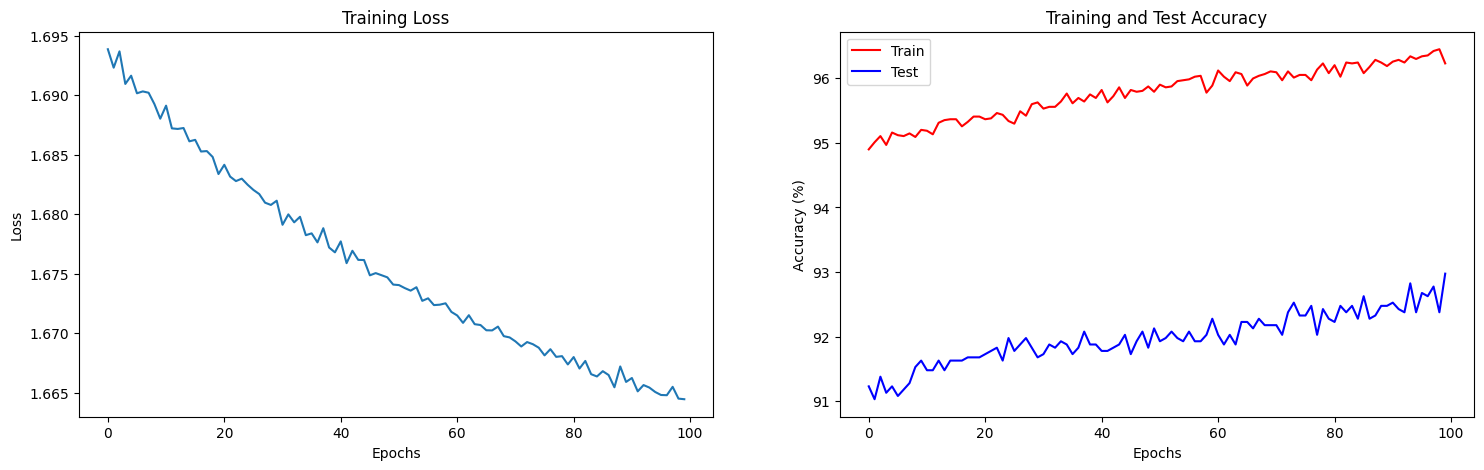

In [99]:
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [100]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9622822658071595
accuracy test   0.929745889387145


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [11:42<00:00,  7.02s/it]


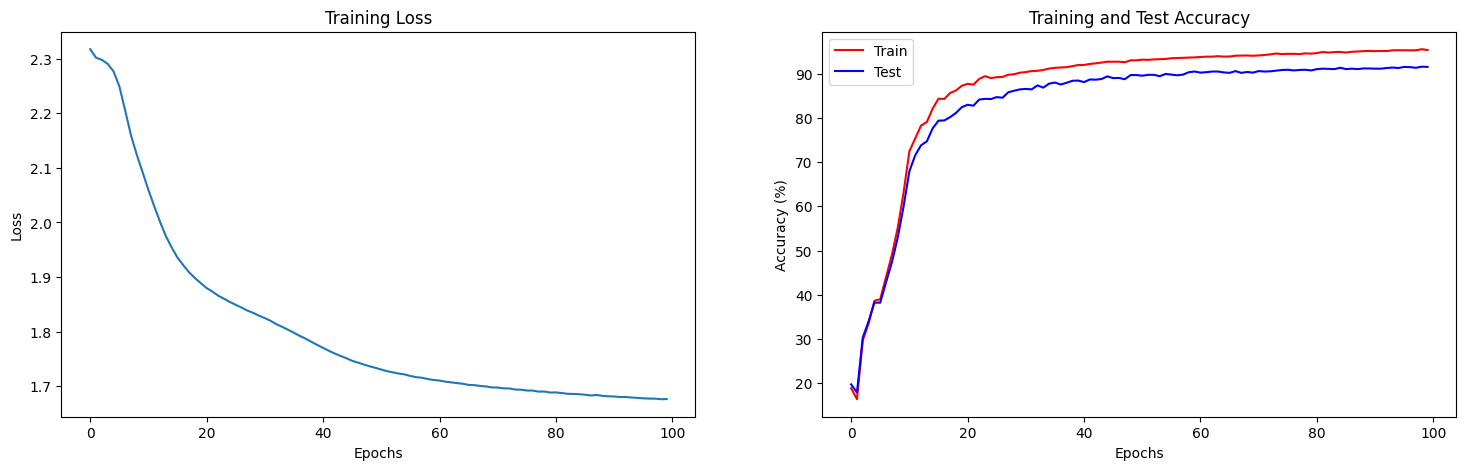

In [107]:
network_2d = Sequential(
    Conv2D(3,3,1,64,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(3136,100),
    ReLU(),
    Linear(100,10),
)
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [108]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9533671649979427
accuracy test   0.9152964623816642


100%|██████████| 100/100 [06:23<00:00,  3.84s/it]


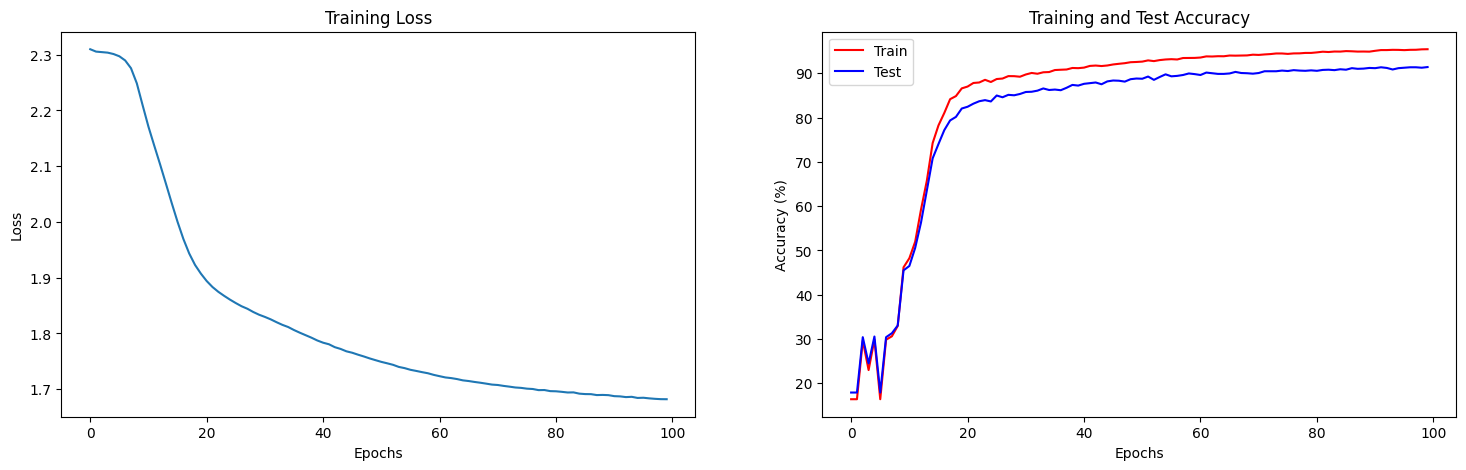

In [109]:
network_2d = Sequential(
    Conv2D(3,3,1,16,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(784,100),
    ReLU(),
    Linear(100,10),
)
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=32,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [110]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9546015635715266
accuracy test   0.9142999501743896


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [19:13<00:00, 11.54s/it]


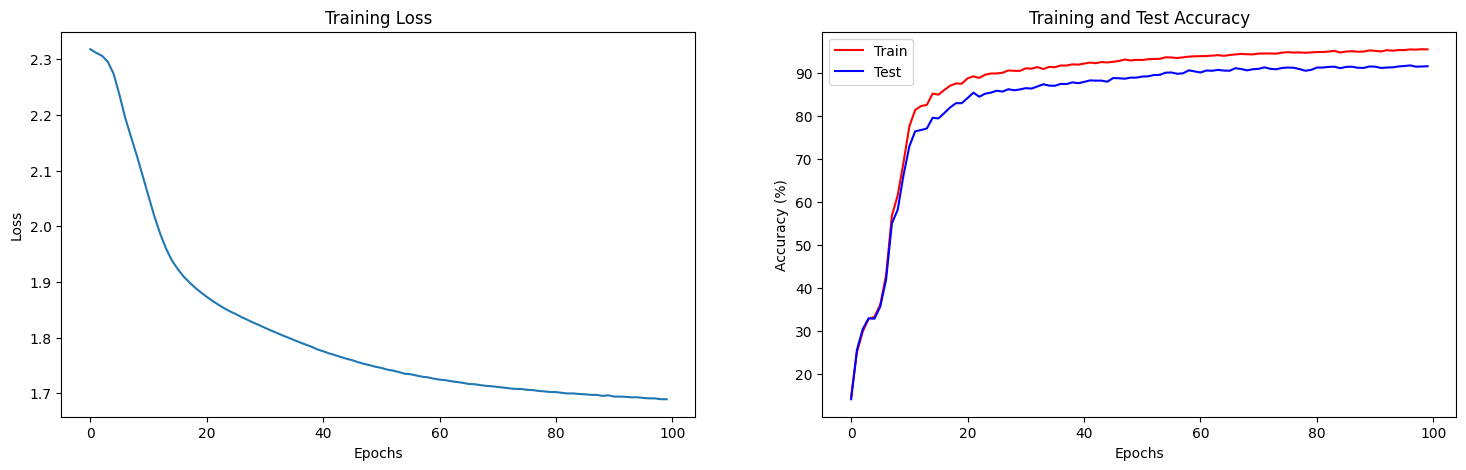

In [112]:
network_2d = Sequential(
    Conv2D(3,3,1,128,1,1),
    AvgPool2D(2,2,2,2),
    Flatten2D(),
    Linear(6272,100),
    ReLU(),
    Linear(100,10),
)
optimizer_2d = Optim(network_2d, LogSoftMaxCrossEntropy(),  1e-4)
optimizer_2d.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)

In [113]:
print("accuracy train : ", optimizer_2d.score(alltrainx_2d, alltrainy))
print("accuracy test  ", optimizer_2d.score(alltestx_2d, alltesty))

accuracy train :  0.9539157865862021
accuracy test   0.9147982062780269


  0%|          | 0/20 [00:00<?, ?it/s]

(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 

  5%|▌         | 1/20 [00:17<05:32, 17.49s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 10%|█         | 2/20 [00:36<05:31, 18.43s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 15%|█▌        | 3/20 [00:52<04:53, 17.27s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 20%|██        | 4/20 [01:06<04:18, 16.14s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 25%|██▌       | 5/20 [01:23<04:03, 16.25s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 30%|███       | 6/20 [01:38<03:40, 15.75s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 35%|███▌      | 7/20 [01:54<03:25, 15.80s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 40%|████      | 8/20 [02:09<03:10, 15.83s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 45%|████▌     | 9/20 [02:25<02:54, 15.84s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 50%|█████     | 10/20 [02:40<02:35, 15.54s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 55%|█████▌    | 11/20 [02:54<02:16, 15.11s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 60%|██████    | 12/20 [03:10<02:03, 15.40s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 65%|██████▌   | 13/20 [03:25<01:45, 15.11s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 70%|███████   | 14/20 [03:39<01:29, 14.94s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 75%|███████▌  | 15/20 [03:54<01:14, 15.00s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 80%|████████  | 16/20 [04:09<00:59, 14.77s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 85%|████████▌ | 17/20 [04:23<00:44, 14.76s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 90%|█████████ | 18/20 [04:38<00:29, 14.78s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

 95%|█████████▌| 19/20 [04:54<00:15, 15.05s/it]

(2007, 512)
(2007, 100)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(128, 5, 5, 32)
(128, 14, 14, 32)
(128, 512)
(128, 100)
(1

100%|██████████| 20/20 [05:10<00:00, 15.53s/it]

(2007, 512)
(2007, 100)


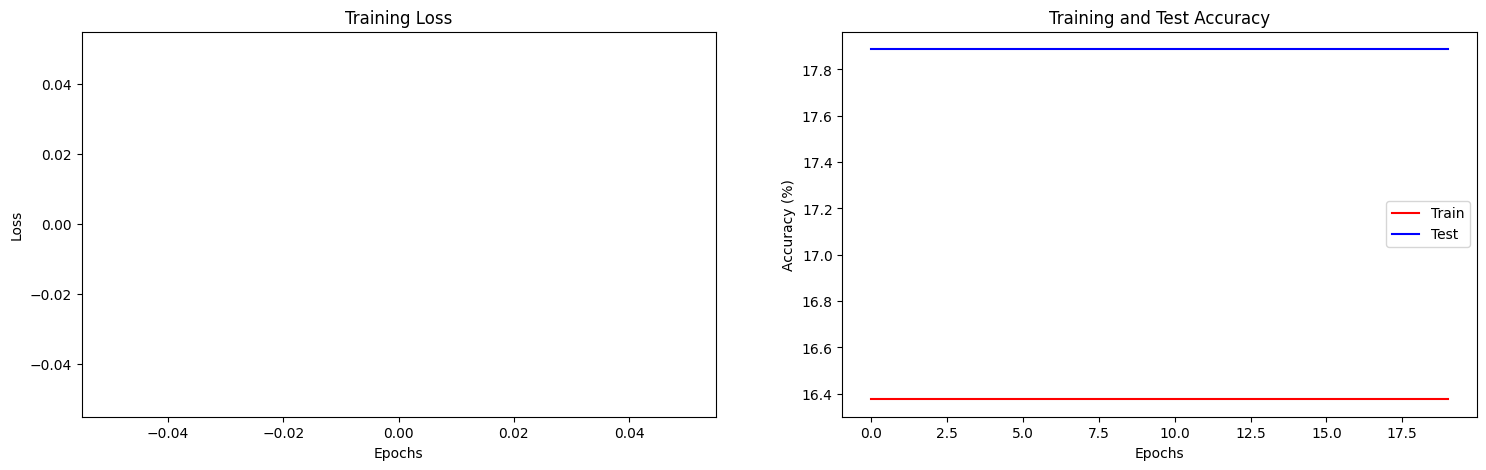

In [44]:
network_2d_2 = Sequential(
    Conv2D(3,3,1,32,1,1),
    AvgPool2D(2,2,2,2),
    Conv2D(3,3,32,64,1,1),
    AvgPool2D(2,2,1,1),
    Flatten2D(),
    Linear(512,100),
    ReLU(),
    Linear(100,10),
)

optimizer_2d_2 = Optim(network_2d_2, LogSoftMaxCrossEntropy(),  1e-2)
optimizer_2d_2.SGD(
    x_train=alltrainx_2d,
    y_train=alltrainy,
    batch_size=128,
    epochs=20,
    x_test=alltestx_2d,
    y_test=alltesty,
    plot=True,
)